In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pyreadstat

In [2]:
data = pd.read_csv("hate_crime.csv")

dtafile = 'incidents.dta'
inc, meta = pyreadstat.read_dta(dtafile)

dtafile = 'records.dta'
rec, meta = pyreadstat.read_dta(dtafile)

dtafile = 'household.dta'
hou, meta = pyreadstat.read_dta(dtafile)

dtafile = 'fin.dta'
fin, meta = pyreadstat.read_dta(dtafile)

/Users/jiheeyou/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
inc['V4002'] = inc['V4002'].astype(str)
rec['V3002'] = rec['V3002'].astype(str)
fin['V2002'] = fin['V2002'].astype(str)

inc["id"] = inc["IDPER"] + inc["V4002"]
rec["id"] = rec["IDPER"] + rec["V3002"]
fin['id'] = fin['IDPER'] + fin['V2002']

In [4]:
df = inc.merge(rec, how='left', on='id')

In [5]:
disabled = df[(df['V3_V4526H3A'] == 1) | # DEAF
   (df['V3_V4526H3B'] == 1) | # BLIND
   (df['V3_V4526H5'] == 1) | # LEARN
   (df['V3_V4526H4'] == 1) | # LIMITS PHYSICAL ACTIVITIES
   (df['V3_V4526H6'] == 1) | # LIMITS INSIDE ...
   (df['V3_V4526H7'] == 1)] # LIMITS OUTSIDE ...

In [6]:
#BY VICTIM RACE
# Change numeric survey result to string
disabled['V3023A'].replace(1,'White',inplace=True)
disabled['V3023A'].replace(2,'Black',inplace=True)
disabled['V3023A'].replace(3,'American Indian, Alaska Native',inplace=True)
disabled['V3023A'].replace(4,'Asian',inplace=True)
disabled['V3023A'].replace(5,'Hawaiian/Pacific Islander',inplace=True)

disabled['V3023A'].replace(6,'Other',inplace=True)
disabled['V3023A'].replace(7,'Other',inplace=True)
disabled['V3023A'].replace(8,'Other',inplace=True)
disabled['V3023A'].replace(9,'Other',inplace=True)
disabled['V3023A'].replace(10,'Other',inplace=True)
disabled['V3023A'].replace(11,'Other',inplace=True)
disabled['V3023A'].replace(12,'Other',inplace=True)
disabled['V3023A'].replace(13,'Other',inplace=True)
disabled['V3023A'].replace(14,'Other',inplace=True)
disabled['V3023A'].replace(15,'Other',inplace=True)
disabled['V3023A'].replace(16,'Other',inplace=True)
disabled['V3023A'].replace(17,'Other',inplace=True)
disabled['V3023A'].replace(18,'Other',inplace=True)
disabled['V3023A'].replace(19,'Other',inplace=True)
disabled['V3023A'].replace(20,'Other',inplace=True)


/Users/jiheeyou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
#BY VICTIM CURRENT GENDER
# Change numeric survey result to string

disabled['V3086'].replace(1,'Male',inplace=True)
disabled['V3086'].replace(2,'Female',inplace=True)
disabled['V3086'].replace(3,'Transgender',inplace=True)
disabled['V3086'].replace(4,'None of These',inplace=True)

V3013 - AGE (ORIGINAL)

In [25]:
male = disabled[disabled['V3086'] == 'Male']
female = disabled[disabled['V3086'] == 'Female']
trans = disabled[disabled['V3086'] == 'Transgender']
none = disabled[disabled['V3086'] == 'None of These']

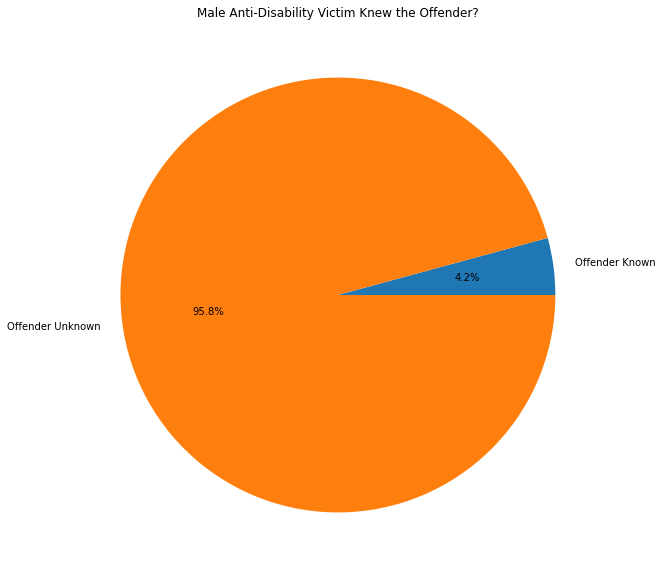

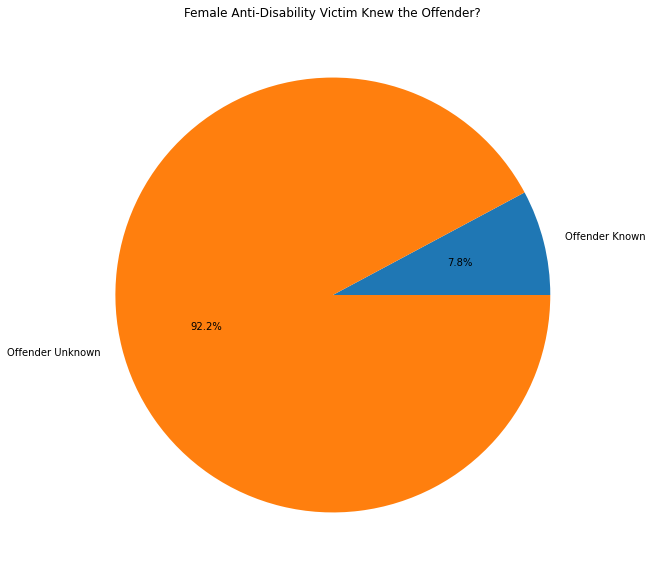

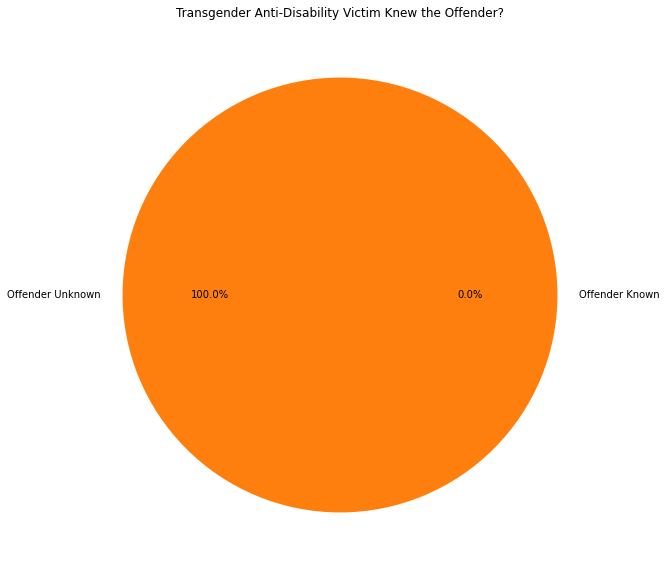

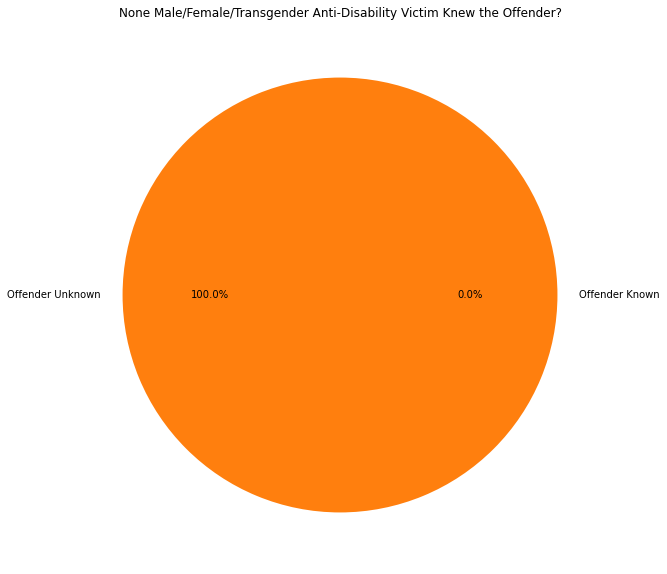

In [16]:
labels = ['Offender Known', 'Offender Unknown']
male = [32,725]
female = [82,967]
trans = [0,11]
none = [0,17]

fig = plt.figure(figsize =(10, 10))
plt.pie(male, labels = labels, autopct='%1.1f%%')
plt.title('Male Anti-Disability Victim Knew the Offender?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(female, labels = labels, autopct='%1.1f%%')
plt.title('Female Anti-Disability Victim Knew the Offender?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(trans, labels = labels, autopct='%1.1f%%')
plt.title('Transgender Anti-Disability Victim Knew the Offender?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(none, labels = labels, autopct='%1.1f%%')
plt.title('None Male/Female/Transgender Anti-Disability Victim Knew the Offender?')
plt.show()

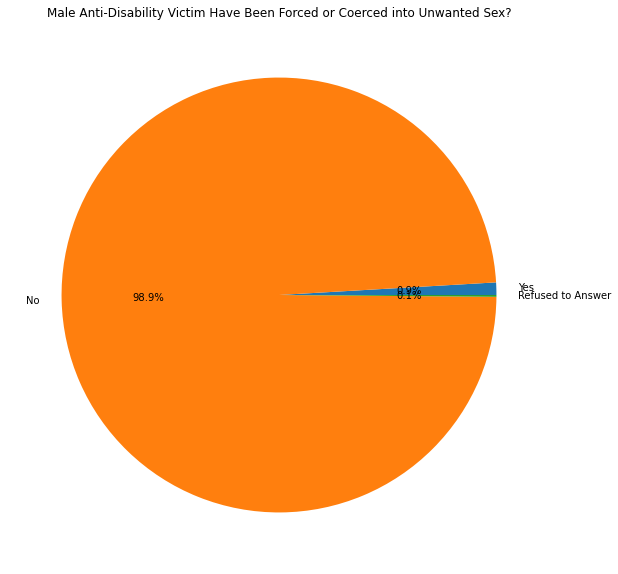

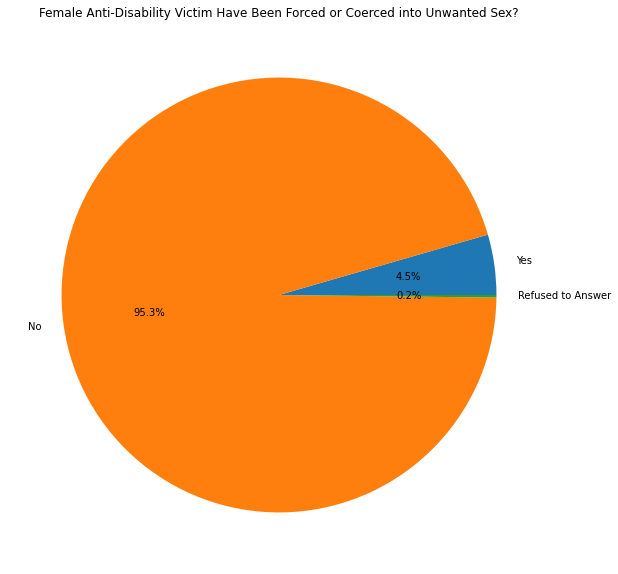

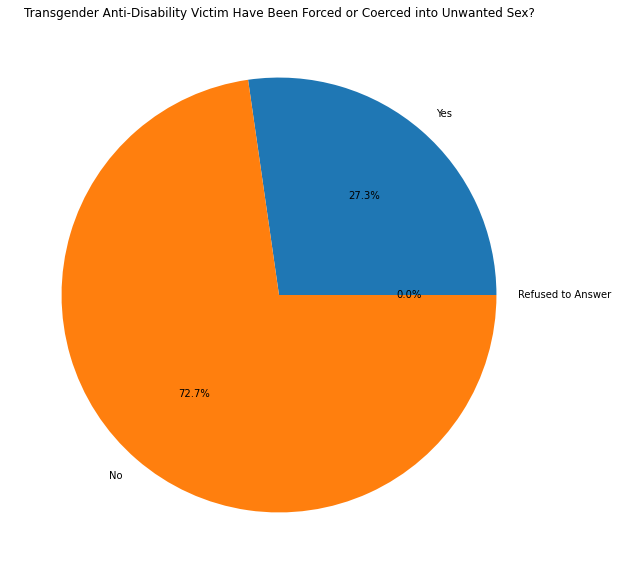

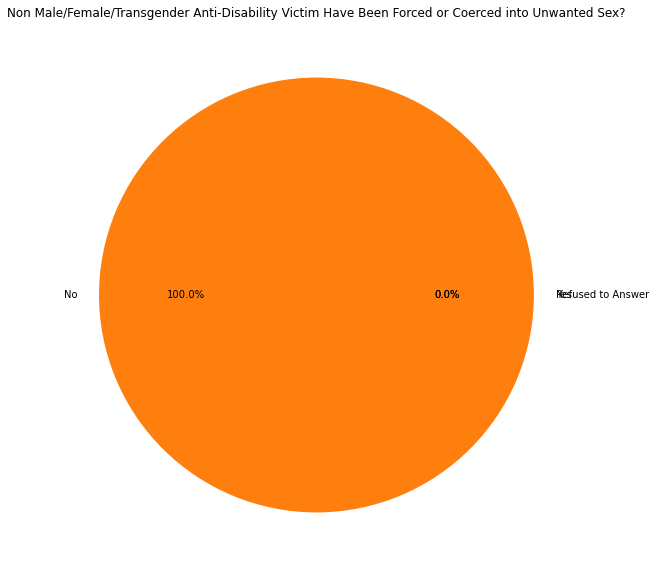

In [23]:
labels = ['Yes', 'No', 'Refused to Answer']
male = [7,749,1]
female = [47,1000,2]
trans = [3,8,0]
none = [0,17,0]

fig = plt.figure(figsize =(10, 10))
plt.pie(male, labels = labels, autopct='%1.1f%%')
plt.title('Male Anti-Disability Victim Have Been Forced or Coerced into Unwanted Sex?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(female, labels = labels, autopct='%1.1f%%')
plt.title('Female Anti-Disability Victim Have Been Forced or Coerced into Unwanted Sex?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(trans, labels = labels, autopct='%1.1f%%')
plt.title('Transgender Anti-Disability Victim Have Been Forced or Coerced into Unwanted Sex?')
plt.show()

fig = plt.figure(figsize =(10, 10))
plt.pie(none, labels = labels, autopct='%1.1f%%')
plt.title('Non Male/Female/Transgender Anti-Disability Victim Have Been Forced or Coerced into Unwanted Sex?')
plt.show()